In [1]:
#load in libaries

import numpy as np
import pandas as pd
from sklearn import set_config
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [2]:
set_config(transform_output = "pandas")

In [3]:
penguins = pd.read_csv("dataset/penguins.csv")
penguins

,bill_length_mm,flipper_length_mm
0,39.1,181
1,39.5,186
2,40.3,195
3,36.7,193
4,39.3,190
...,...,...
337,55.8,207
338,43.5,202
339,49.6,193
340,50.8,210


In [ ]:
#look at range of our variables
penguins.agg(['min','max'])

,bill_length_mm,flipper_length_mm
min,32.1,172
max,59.6,231


In [ ]:
#standardize our variables
penguins_copy = penguins.copy()
scaler = StandardScaler() #initialize scaler
standardized_penguins = scaler.fit_transform(penguins_copy)
standardized_penguins

,bill_length_mm,flipper_length_mm
0,-0.884499,-1.418347
1,-0.811126,-1.062250
2,-0.664380,-0.421277
3,-1.324737,-0.563715
4,-0.847812,-0.777373
...,...,...
337,2.178824,0.433355
338,-0.077396,0.077258
339,1.041543,-0.563715
340,1.261662,0.647013


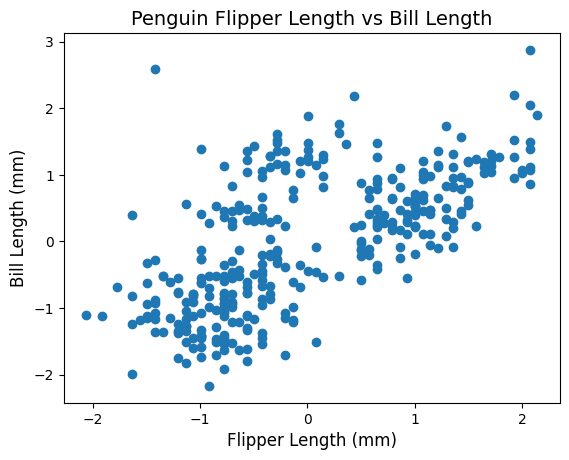

In [6]:
# Scatter plot for bill_length_mm vs flipper_length_mm
plt.scatter(standardized_penguins['flipper_length_mm'], standardized_penguins['bill_length_mm'])

# Adding labels and title
plt.title('Penguin Flipper Length vs Bill Length', fontsize=14)
plt.ylabel('Bill Length (mm)', fontsize=12)
plt.xlabel('Flipper Length (mm)', fontsize=12)

# Display the plot
plt.show()

In [7]:
# Perform K-means clustering
# K = 5

kmeans = KMeans(n_clusters = 5, random_state = 123, n_init = 10)

In [8]:
#fit model to our data
clusters = kmeans.fit(standardized_penguins)

In [10]:
clusters.labels_

array([1, 1, 4, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 4, 1, 4, 1,
       1, 1, 1, 1, 4, 1, 1, 1, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1,
       1, 1, 4, 1, 1, 1, 2, 1, 4, 1, 4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 1, 4, 1, 4, 1, 2, 1, 4, 1,
       1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 4, 2, 3, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2,
       3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 3, 3, 0, 3, 3, 3, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 2,
       3, 2, 3, 2, 3, 2, 2, 3, 2, 3, 4, 0, 0, 4, 0, 4, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 0, 0, 4, 0, 4, 0, 4, 0, 4, 0, 0,

In [11]:
standardized_penguins_with_clusters = standardized_penguins.copy()
standardized_penguins_with_clusters["Clusters"] = clusters.labels_
standardized_penguins_with_clusters

,bill_length_mm,flipper_length_mm,Clusters
0,-0.884499,-1.418347,1
1,-0.811126,-1.062250,1
2,-0.664380,-0.421277,4
3,-1.324737,-0.563715,1
4,-0.847812,-0.777373,1
...,...,...,...
337,2.178824,0.433355,0
338,-0.077396,0.077258,4
339,1.041543,-0.563715,0
340,1.261662,0.647013,0


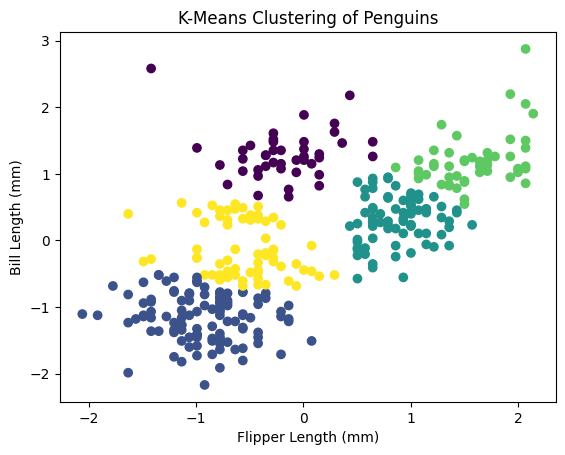

In [13]:
# Plot the clusters
plt.scatter(standardized_penguins_with_clusters['flipper_length_mm'], standardized_penguins_with_clusters['bill_length_mm'], c=standardized_penguins_with_clusters['Clusters'])
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Bill Length (mm)')
plt.title('K-Means Clustering of Penguins')
plt.show()


In [14]:
clusters.inertia_ #total wssd

91.47610853298526

In [ ]:
#initialize a data frame
penguin_clust_ks = pd.DataFrame(columns = ["k","wssd"])

for k in range(1,11): #looping through value of k 1,2,3,4,5,6,7,8,9,10
    kmeans = KMeans(n_clusters = k, random_state = 123, n_init = 10) #initialize kmeans for current k
    kmeans.fit(standardized_penguins) #fit it to our data
    current_k = pd.DataFrame({"k":[k], "wssd":kmeans.inertia_}) #create a DF for current value of k
    penguin_clust_ks = pd.concat([penguin_clust_ks, current_k], ignore_index = True) #concat current value with large df

/var/folders/9y/zgnxp44x71g645k284kc5j_h0000gn/T/ipykernel_20485/1387781951.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  penguin_clust_ks = pd.concat([penguin_clust_ks, current_k], ignore_index = True)


In [17]:
penguin_clust_ks

,k,wssd
0,1,684.000000
1,2,247.016625
2,3,157.815322
3,4,118.766244
4,5,91.476109
5,6,78.716593
6,7,66.722277
7,8,57.914115
8,9,52.458720
9,10,48.642403


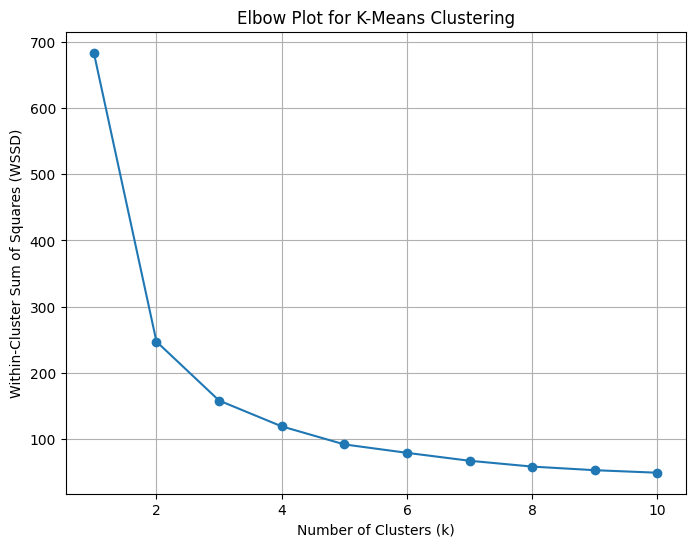

In [18]:
# Create the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(penguin_clust_ks['k'], penguin_clust_ks['wssd'], marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WSSD)')
plt.title('Elbow Plot for K-Means Clustering')
plt.grid(True)
plt.show()
